In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import cluster, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
data = data.fillna({'CREDIT_LIMIT':data['CREDIT_LIMIT'].mean(),
                    'MINIMUM_PAYMENTS':data['MINIMUM_PAYMENTS'].mean()})

In [7]:
data['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [8]:
data = data.drop('CUST_ID', axis=1)

In [9]:
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(data)
X_norm[0][0]

-0.7319893664465486

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

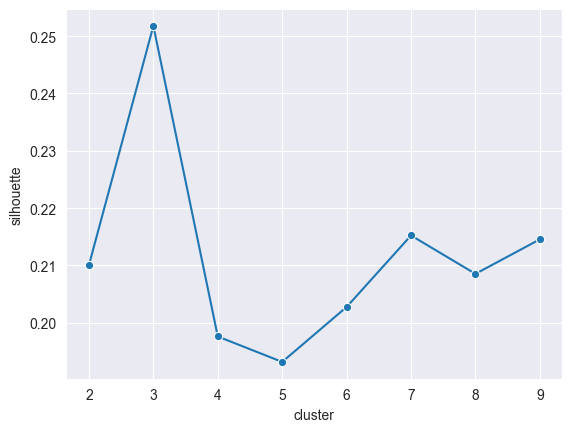

In [10]:
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='random', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = X_norm

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [11]:
kmeans = cluster.KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_norm)
labels = kmeans.predict(X_norm)
data['labels'] = labels

In [12]:
data['labels'].value_counts()

0    6118
1    1597
2    1235
Name: labels, dtype: int64

In [13]:
DB = cluster.DBSCAN()
DB_labels = DB.fit_predict(X_norm)
data['DB_labels'] = DB_labels

In [15]:
data['DB_labels'].nunique()

39

In [18]:
def get_silhouette(eps, min_samples, X):
    dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
    predict = dbscan.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, predict)
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "eps": [], "min_samples":[]}

# выберем нужные данные 
X = X_norm

for eps in np.arange(0.1,3,0.2):
    for min_samples in range(1,20,4):
        silhouette_res["silhouette"].append(get_silhouette(eps, min_samples, X))
        silhouette_res["eps"].append(eps)
        silhouette_res["min_samples"].append(min_samples)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Anna\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Anna\AppData\Local\Temp\ipykernel_10244\1949677477.py", line 26, in <module>
    sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py", line 612, in lineplot
    p = _LinePlotter(
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py", line 365, in __init__
    super().__init__(data=data, variables=variables)
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py", line 640, in __init__
    self.assign_variables(data, variables)
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py", line 701, in assign_

<AxesSubplot: xlabel='eps', ylabel='silhouette'>

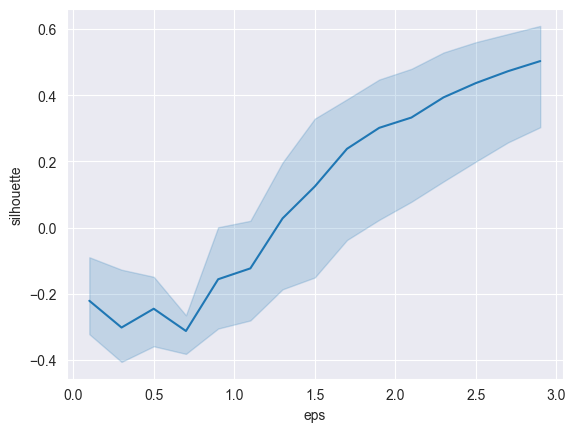

In [23]:
sns.lineplot(silhouette_df, x='eps', y='silhouette')

In [25]:
silhouette_df[silhouette_df['silhouette']==0.6173453608696496]

,silhouette,eps,min_samples
71,0.617345,2.9,5


<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

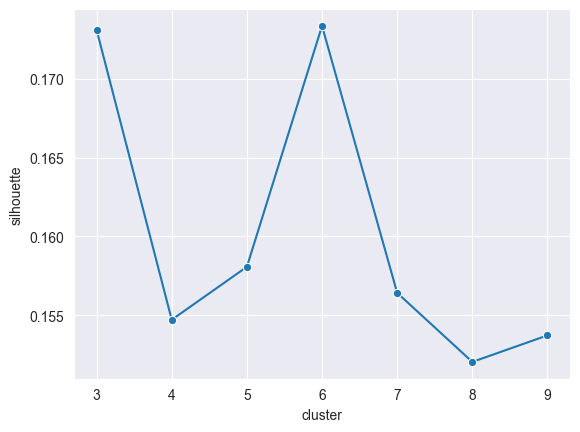

In [27]:
def get_silhouette(cluster_num, X):
    AggC =  cluster.AgglomerativeClustering(n_clusters=cluster_num)
    predict = AggC.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, predict)
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = X_norm

for cluster_num in range(3, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [28]:
silhouette_df['silhouette'].max()

0.17335577924064002

In [29]:
silhouette_df[silhouette_df['silhouette']==0.17335577924064002]

,silhouette,cluster
3,0.173356,6


In [30]:
clust = cluster.AgglomerativeClustering(n_clusters=6)
Ag_labels = clust.fit_predict(X_norm)
data['Ag_labels'] = Ag_labels

In [31]:
data['Ag_labels'].value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
Name: Ag_labels, dtype: int64

c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


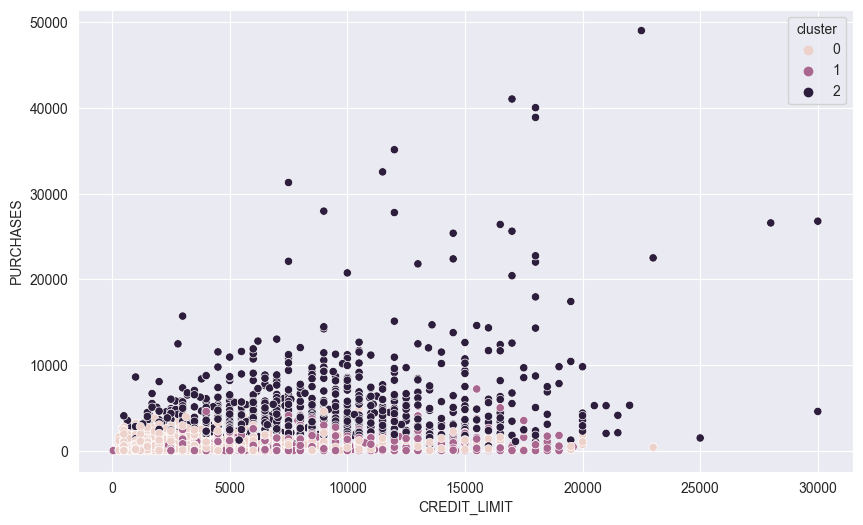

In [32]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
data['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()